In [43]:
import numpy as np 
from functions import calc_lk ,  given_dist 
from matplotlib import pyplot as plt 
import random as rnd 
import seaborn as sns
np.random.seed(973486374)

In [44]:
def gen_rand_n(x_min ,x_max , n):
    x = []
    n = int(n)
    for i in range(n):
        mu = rnd.uniform(0,1)
        xi = x_min + mu*(x_max-x_min)
        x.append(xi)
    if (len(x)==1):
        return x[0]
    else:
        return x

In [45]:
def gen_samples(f,x_min , x_max , y_max , N):
    x_acc = []
    i = 0
    while(i<N):
        x = gen_rand_n(x_min,x_max,1)
        y = np.random.uniform(0,y_max)
        if(y<f(x)):
            x_acc.append(x)
            i+=1
    return x_acc

In [48]:
def pdf_const_bin(x, bins):
    x = np.asarray(x)
    v_min = np.amin(x)
    v_max = np.amax(x)
    h = (v_max-v_min)/bins
    tot_length = len(x)
    #print(v_min , v_max)
    hist = []
    x_axis = []
    for i in range(bins):
        temp_min = v_min+i*h
        temp_max = v_min+(i+1)*h
        #print(temp_min, temp_max)
        temp = [x_val for x_val in x if ((x_val>temp_min) and(x_val<=temp_max))]
        #print(temp)
        count = (len(temp)/tot_length)/h
        hist.append(count)
        x_axis.append((temp_min+temp_max)/2)
    return(hist , x_axis)

In [8]:
def gauss_dist(x , mu , sigma):
    coeff = 1/((2*np.pi*sigma**2)**0.5)
    e_term = np.exp(-(x-mu)**2/(2*sigma**2))
    return coeff*e_term


In [47]:
def scatter_dist(alpha):
    def to_return(x):
        N = 2*(1+alpha/3)
        val = (1+alpha*(x**2))/N
        return val
    return to_return


0.3989422804014327
500 41336


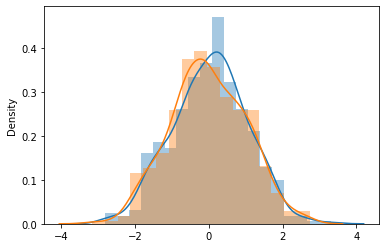

In [10]:
x_rnd = np.linspace(-1 , 1 , 100)
mu = 0
sigma = 1 
y_max = 1/((2*np.pi*sigma**2)**0.5)
print(y_max)
N = 500
i = 0 
x_acc = []
j = 0
while(i<N):
    j+=1
    x = gen_rand_n(-100,100,1)
    y = np.random.uniform(0,y_max)
    if(y<gauss_dist(x,mu,sigma)):
        x_acc.append(x)
        i+=1
print(i,j)
x_std = np.random.normal(mu,sigma,N)
sns.distplot(x_acc , kde=1)
sns.distplot(x_std , kde=1)
plt.show()

In [46]:
def scatter_dist(alpha):
    def to_return(x):
        N = 2*(1+alpha/3)
        val = (1+alpha*(x**2))/N
        return val
    return to_return


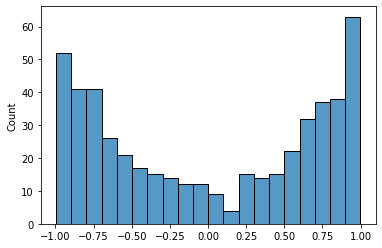

In [13]:
alpha = 5.5
N = 500
y_max = (1+alpha)/(2*(1+alpha/3))
y = gen_samples(given_dist(alpha) , -1 , 1 , y_max , N)
sns.histplot(y , bins=20)
plt.show()

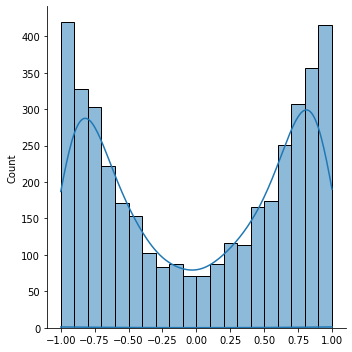

In [14]:
alpha = 5.5
N = 4000
y_max = y_max = (1+alpha)/(2*(1+alpha/3))
y = gen_samples(given_dist(alpha) , -1 , 1 , y_max , N)
sns.displot(y , bins=20 ,  kde=1)

x = np.linspace(-1,1,100)
y_th = given_dist(alpha)(x)
sns.lineplot(x=x , y = y_th)
plt.show()

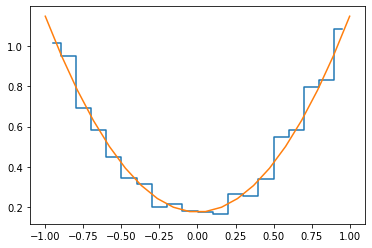

In [41]:
alpha = 5.5
N = 4000
y_max =y_max = (1+alpha)/(2*(1+alpha/3))
y = gen_samples(given_dist(alpha) , -1 , 1 , y_max , N)
dist , bins = pdf_const_bin(y , 20)
plt.step(bins, dist , where='mid')

x = np.linspace(-1,1,20)
y_th = given_dist(alpha)(x)
sns.lineplot(x=x , y = y_th)
plt.show()

In [242]:
delta_x = bins[1]-bins[0]
print(sum([h*delta_x for h in hist]))

0.19992440078714263
